In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [4]:
TCS = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Indian/StockPrice/TCS_stock_v2_PreProcessed.csv")
HDFC = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Indian/StockPrice/HDFC_stock_v2_PreProcessed.csv")
HUL = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Indian/StockPrice/HUL_stock_v2_PreProcessed.csv")
MARUTI = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Indian/StockPrice/MARUTI_stock_v2_PreProcessed.csv")

In [101]:
TCS_SMA_sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Indian/TechIndicators/TCS_SMA_PreProcessed.csv')
HDFC_SMA_sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Indian/TechIndicators/HDFC_SMA_PreProcessed.csv')
HUL_SMA_sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Indian/TechIndicators/HUL_SMA_PreProcessed.csv')
MARUTI_SMA_sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Indian/TechIndicators/MARUTI_SMA_PreProcessed.csv')

TCS_EMA_sub =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Indian/TechIndicators/TCS_EMA_PreProcessed.csv')
HDFC_EMA_sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Indian/TechIndicators//HDFC_EMA_PreProcessed.csv')
HUL_EMA_sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Indian/TechIndicators/HUL_EMA_PreProcessed.csv')
MARUTI_EMA_sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Indian/TechIndicators/MARUTI_EMA_PreProcessed.csv')

### Data Proprocessing

In [6]:
def Dataset(Data, column, datecol,date):

  Train_Data = Data[column][Data[datecol] < date].to_numpy()
  Data_Train = []
  Data_Train_X = []
  Data_Train_Y = []
  for i in range(0, len(Train_Data), 5):
    try:
      Data_Train.append(Train_Data[i : i + 5])
    except:
      pass

  if len(Data_Train[-1]) < 5:
    Data_Train.pop(-1)
  
  Data_Train_X = Data_Train[0 : -1]
  Data_Train_X = np.array(Data_Train_X)
  Data_Train_X = Data_Train_X.reshape((-1, 5, 1))
  Data_Train_Y = Data_Train[1 : len(Data_Train)]
  Data_Train_Y = np.array(Data_Train_Y)
  Data_Train_Y = Data_Train_Y.reshape((-1, 5, 1))


  Test_Data = Data[column][Data[datecol] >= date].to_numpy()
  Data_Test = []
  Data_Test_X = []
  Data_Test_Y = []
  for i in range(0, len(Test_Data), 5):
    try:
      Data_Test.append(Test_Data[i : i + 5])
    except:
      pass

  if len(Data_Test[-1]) < 5:
    Data_Test.pop(-1)
  
  Data_Test_X = Data_Test[0 : -1]
  Data_Test_X = np.array(Data_Test_X)
  Data_Test_X = Data_Test_X.reshape((-1, 5, 1))
  Data_Test_Y = Data_Test[1 : len(Data_Test)]
  Data_Test_Y = np.array(Data_Test_Y)
  Data_Test_Y = Data_Test_Y.reshape((-1, 5, 1))

  return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

### Model

In [7]:
def Model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 3), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model

In [8]:
model = Model()

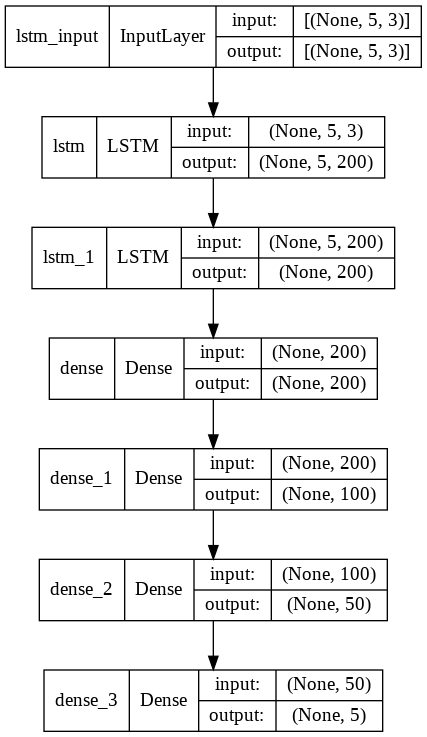

In [9]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 200)            163200    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 200)               40200     
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 5)                 255       
                                                                 
Total params: 549,605
Trainable params: 549,605
Non-trai

### Custom Learning Rate

In [13]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

In [14]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

#TCS

In [15]:
TCS.tail()

,ticker,date,open,high,low,close,adj close,volume,Moving Average for 10 days,Moving Average for 20 days,Moving Average for 50 days,Daily Return
692,MARUTI.NS,2021-10-25,7355.0,7396.05,7219.65,7260.60,7260.60,247986.0,7552.180,7439.1900,7082.932,-0.020016
693,MARUTI.NS,2021-10-26,7265.0,7337.95,7210.20,7297.35,7297.35,292052.0,7511.835,7433.8850,7088.639,0.005062
694,MARUTI.NS,2021-10-27,7285.0,7461.25,7244.00,7356.25,7356.25,1217557.0,7478.080,7430.5050,7095.720,0.008071
695,MARUTI.NS,2021-10-28,7250.0,7529.70,7235.05,7369.70,7369.70,961188.0,7466.835,7429.7875,7106.577,0.001828
696,MARUTI.NS,2021-10-29,7350.0,7478.15,7294.85,7466.30,7466.30,179815.0,7463.775,7436.2000,7118.195,0.013108


In [16]:
TCS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ticker                      697 non-null    object 
 1   date                        697 non-null    object 
 2   open                        697 non-null    float64
 3   high                        697 non-null    float64
 4   low                         697 non-null    float64
 5   close                       697 non-null    float64
 6   adj close                   697 non-null    float64
 7   volume                      697 non-null    float64
 8   Moving Average for 10 days  688 non-null    float64
 9   Moving Average for 20 days  678 non-null    float64
 10  Moving Average for 50 days  648 non-null    float64
 11  Daily Return                696 non-null    float64
dtypes: float64(10), object(2)
memory usage: 65.5+ KB


In [17]:
# Change Dtype of date column
TCS["date"] = pd.to_datetime(TCS["date"])
TCS_SMA_sub['time'] = pd.to_datetime(TCS_SMA_sub['time'])
TCS_EMA_sub['time'] = pd.to_datetime(TCS_EMA_sub['time'])

###Split the Data into Training and Test set
    Training Period: 2019-01-01 - 2021-08-01

    Testing Period:  2021-08-01 - 2021-10-29

In [ ]:
TCS_date = '2021-08-01'
TCS_Train_X, TCS_Train_Y, TCS_Test_X, TCS_Test_Y = Dataset(TCS,'adj close', 'date', TCS_date)
TCS_Train_SMA_X, TCS_Train_SMA_Y, TCS_Test_SMA_X, TCS_Test_SMA_Y = Dataset(TCS_SMA_sub,'SMA', 'time', TCS_date)
TCS_Train_EMA_X, TCS_Train_EMA_Y, TCS_Test_EMA_X, TCS_Test_EMA_Y = Dataset(TCS_EMA_sub,'EMA', 'time', TCS_date)

In [ ]:
TCS_Train_X.shape, TCS_Train_Y.shape, TCS_Test_X.shape, TCS_Test_Y.shape

((126, 5, 1), (126, 5, 1), (11, 5, 1), (11, 5, 1))

In [ ]:
TCS['adj close'].head(20)

0     7261.91
1     7058.96
2     6996.90
3     7026.57
4     7150.46
5     7225.68
6     7277.54
7     7179.16
8     7110.10
9     7195.76
10    7143.75
11    7100.14
12    7125.40
13    7146.47
14    7001.22
15    6865.68
16    6842.91
17    6838.24
18    6326.20
19    6323.91
Name: adj close, dtype: float64

In [ ]:
TCS_Train_X[0], TCS_Train_Y[0]

(array([[7261.91],
        [7058.96],
        [6996.9 ],
        [7026.57],
        [7150.46]]), array([[7225.68],
        [7277.54],
        [7179.16],
        [7110.1 ],
        [7195.76]]))

In [ ]:
TCS_Train_X[1], TCS_Train_Y[1]

(array([[7225.68],
        [7277.54],
        [7179.16],
        [7110.1 ],
        [7195.76]]), array([[7143.75],
        [7100.14],
        [7125.4 ],
        [7146.47],
        [7001.22]]))

In [ ]:
TCS_Train_SMA_X.shape, TCS_Train_SMA_Y.shape, TCS_Test_SMA_X.shape, TCS_Test_SMA_X.shape

((126, 5, 1), (126, 5, 1), (11, 5, 1), (11, 5, 1))

In [ ]:
TCS_Train_EMA_X.shape, TCS_Train_EMA_Y.shape, TCS_Test_EMA_X.shape, TCS_Test_EMA_X.shape

((126, 5, 1), (126, 5, 1), (11, 5, 1), (11, 5, 1))

In [ ]:
TCS_Train_X[0], TCS_Train_SMA_X[0]

(array([[7261.91],
        [7058.96],
        [6996.9 ],
        [7026.57],
        [7150.46]]), array([[1837.1739],
        [1831.0021],
        [1824.2374],
        [1816.3589],
        [1816.3016]]))

In [ ]:
TCS_Final_Train_X = np.concatenate((TCS_Train_X, TCS_Train_SMA_X, TCS_Train_EMA_X), axis=2)
TCS_Final_Test_X = np.concatenate((TCS_Test_X, TCS_Test_SMA_X, TCS_Test_EMA_X), axis=2)

In [ ]:
TCS_Final_Train_X.shape, TCS_Train_Y.shape, TCS_Final_Test_X.shape, TCS_Test_Y.shape

((126, 5, 3), (126, 5, 1), (11, 5, 3), (11, 5, 1))

### Model Fitting

In [28]:
TCS_Model = Model()

In [31]:
TCS_Model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [32]:
TCS_hist = TCS_Model.fit(TCS_Final_Train_X, TCS_Train_Y, epochs = 10000, validation_data = (TCS_Final_Test_X, TCS_Test_Y), callbacks=[callback])

Epoch 1/10000
4/4 [==============================] - 3s 180ms/step - loss: 28598930.0000 - root_mean_squared_error: 5347.7969 - val_loss: 9440228.0000 - val_root_mean_squared_error: 3072.4954
Epoch 2/10000
4/4 [==============================] - 0s 39ms/step - loss: 17788692.0000 - root_mean_squared_error: 4217.6646 - val_loss: 23532586.0000 - val_root_mean_squared_error: 4851.0400
Epoch 3/10000
4/4 [==============================] - 0s 44ms/step - loss: 12986796.0000 - root_mean_squared_error: 3603.7197 - val_loss: 2211034.0000 - val_root_mean_squared_error: 1486.9546
Epoch 4/10000
4/4 [==============================] - 0s 38ms/step - loss: 4390088.0000 - root_mean_squared_error: 2095.2539 - val_loss: 3515449.7500 - val_root_mean_squared_error: 1874.9532
Epoch 5/10000
4/4 [==============================] - 0s 43ms/step - loss: 2665764.0000 - root_mean_squared_error: 1632.7168 - val_loss: 1020593.8125 - val_root_mean_squared_error: 1010.2444
Epoch 6/10000
4/4 [==========================

In [33]:
history_dict = TCS_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

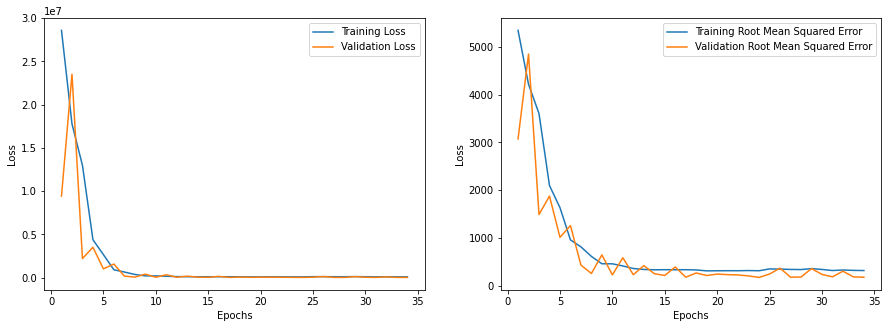

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of TCS

In [35]:
TCS_prediction = TCS_Model.predict(TCS_Final_Test_X)

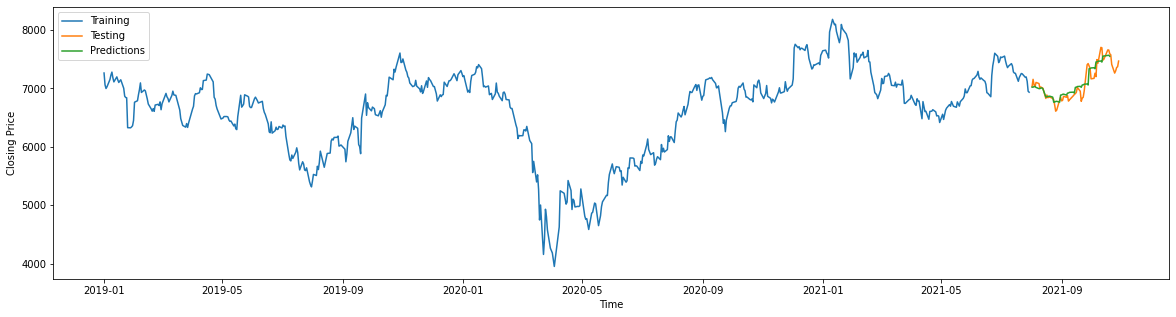

In [36]:
plt.figure(figsize=(20, 5))
plt.plot(TCS['date'][TCS['date'] < '2021-08-01'], TCS['adj close'][TCS['date'] < '2021-08-01'], label = 'Training')
plt.plot(TCS['date'][TCS['date'] >= '2021-08-01'], TCS['adj close'][TCS['date'] >= '2021-08-01'], label = 'Testing')
plt.plot(TCS['date'][TCS['date'] >= '2021-08-01'][:-7], TCS_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [37]:
rmse = math.sqrt(mean_squared_error(TCS_Test_Y.reshape(-1, 5), TCS_prediction))
mape = np.mean(np.abs(TCS_prediction - TCS_Test_Y.reshape(-1, 5))/np.abs(TCS_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 169.08418343515388
MAPE: 0.018315252193243817


#HDFC

In [38]:
HDFC.tail()

,ticker,date,open,high,low,close,adj close,volume,Moving Average for 10 days,Moving Average for 20 days,Moving Average for 50 days,Daily Return
692,HDFC.NS,2021-10-25,2905.00,2919.0,2856.25,2896.15,2896.15,3463033.0,2815.240,2783.7400,2772.205,-0.002686
693,HDFC.NS,2021-10-26,2908.00,2934.0,2896.00,2911.65,2911.65,2429951.0,2831.480,2787.3325,2777.063,0.005352
694,HDFC.NS,2021-10-27,2920.05,2948.0,2901.40,2915.00,2915.00,3136162.0,2847.470,2792.8350,2781.280,0.001151
695,HDFC.NS,2021-10-28,2891.00,2924.3,2863.15,2900.80,2900.80,3302501.0,2860.990,2800.5525,2784.673,-0.004871
696,HDFC.NS,2021-10-29,2891.00,2893.0,2791.20,2844.70,2844.70,3829786.0,2864.585,2805.0725,2786.799,-0.019339


In [39]:
HDFC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ticker                      697 non-null    object 
 1   date                        697 non-null    object 
 2   open                        697 non-null    float64
 3   high                        697 non-null    float64
 4   low                         697 non-null    float64
 5   close                       697 non-null    float64
 6   adj close                   697 non-null    float64
 7   volume                      697 non-null    float64
 8   Moving Average for 10 days  688 non-null    float64
 9   Moving Average for 20 days  678 non-null    float64
 10  Moving Average for 50 days  648 non-null    float64
 11  Daily Return                696 non-null    float64
dtypes: float64(10), object(2)
memory usage: 65.5+ KB


In [40]:
# Change Dtype of date column
HDFC["date"] = pd.to_datetime(HDFC["date"])

###Split the Data into Training and Test set
    Training Period: 2019-01-01 - 2021-08-01

    Testing Period:  2021-08-01 - 2021-10-29

In [41]:
HDFC_date = '2021-08-01'
HDFC_Train_X, HDFC_Train_Y, HDFC_Test_X, HDFC_Test_Y = Dataset(HDFC,'adj close', 'date', HDFC_date)
HDFC_Train_SMA_X, HDFC_Train_SMA_Y, HDFC_Test_SMA_X, HDFC_Test_SMA_Y = Dataset(HDFC_SMA_sub,'SMA', 'time', HDFC_date)
HDFC_Train_EMA_X, HDFC_Train_EMA_Y, HDFC_Test_EMA_X, HDFC_Test_EMA_Y = Dataset(HDFC_EMA_sub,'EMA', 'time', HDFC_date)

In [42]:
HDFC_Train_X.shape, HDFC_Train_Y.shape, HDFC_Test_X.shape, HDFC_Test_Y.shape

((126, 5, 1), (126, 5, 1), (11, 5, 1), (11, 5, 1))

In [43]:
HDFC['adj close'].head(20)

0     1914.72
1     1887.70
2     1845.95
3     1880.02
4     1880.31
5     1867.01
6     1901.32
7     1887.17
8     1897.94
9     1876.78
10    1898.66
11    1882.31
12    1910.47
13    1912.67
14    1910.38
15    1886.50
16    1866.35
17    1878.59
18    1884.98
19    1855.53
Name: adj close, dtype: float64

In [44]:
HDFC_Train_X[0], HDFC_Train_Y[0]

(array([[1914.72],
        [1887.7 ],
        [1845.95],
        [1880.02],
        [1880.31]]), array([[1867.01],
        [1901.32],
        [1887.17],
        [1897.94],
        [1876.78]]))

In [45]:
HDFC_Train_X[1], HDFC_Train_Y[1]

(array([[1867.01],
        [1901.32],
        [1887.17],
        [1897.94],
        [1876.78]]), array([[1898.66],
        [1882.31],
        [1910.47],
        [1912.67],
        [1910.38]]))

In [46]:
HDFC_Train_SMA_X.shape, HDFC_Train_SMA_Y.shape, HDFC_Test_SMA_X.shape, HDFC_Test_SMA_X.shape

((126, 5, 1), (126, 5, 1), (11, 5, 1), (11, 5, 1))

In [47]:
HDFC_Train_EMA_X.shape, HDFC_Train_EMA_Y.shape, HDFC_Test_EMA_X.shape, HDFC_Test_EMA_X.shape

((126, 5, 1), (126, 5, 1), (11, 5, 1), (11, 5, 1))

In [48]:
HDFC_Train_X[0], HDFC_Train_SMA_X[0]

(array([[1914.72],
        [1887.7 ],
        [1845.95],
        [1880.02],
        [1880.31]]), array([[1902.8489],
        [1905.3586],
        [1901.2421],
        [1900.747 ],
        [1902.8392]]))

In [49]:
HDFC_Final_Train_X = np.concatenate((HDFC_Train_X, HDFC_Train_SMA_X, HDFC_Train_EMA_X), axis=2)
HDFC_Final_Test_X = np.concatenate((HDFC_Test_X, HDFC_Test_SMA_X, HDFC_Test_EMA_X), axis=2)

In [50]:
HDFC_Final_Train_X.shape, HDFC_Train_Y.shape, HDFC_Final_Test_X.shape, HDFC_Test_Y.shape

((126, 5, 3), (126, 5, 1), (11, 5, 3), (11, 5, 1))

In [52]:
HDFC_Train_X.shape, HDFC_Train_Y.shape, HDFC_Test_X.shape, HDFC_Test_Y.shape

((126, 5, 1), (126, 5, 1), (11, 5, 1), (11, 5, 1))

### Model Fitting

In [53]:
HDFC_Model = Model()

In [54]:
HDFC_Model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [55]:
HDFC_hist = HDFC_Model.fit(HDFC_Final_Train_X, HDFC_Train_Y, epochs = 10000, validation_data = (HDFC_Final_Test_X, HDFC_Test_Y), callbacks=[callback])

Epoch 1/10000
4/4 [==============================] - 3s 166ms/step - loss: 8852295.0000 - root_mean_squared_error: 2975.2808 - val_loss: 761526.0625 - val_root_mean_squared_error: 872.6547
Epoch 2/10000
4/4 [==============================] - 0s 38ms/step - loss: 2459019.5000 - root_mean_squared_error: 1568.1261 - val_loss: 3515015.0000 - val_root_mean_squared_error: 1874.8373
Epoch 3/10000
4/4 [==============================] - 0s 38ms/step - loss: 1248284.5000 - root_mean_squared_error: 1117.2665 - val_loss: 1380410.3750 - val_root_mean_squared_error: 1174.9087
Epoch 4/10000
4/4 [==============================] - 0s 38ms/step - loss: 517747.2188 - root_mean_squared_error: 719.5465 - val_loss: 374039.2812 - val_root_mean_squared_error: 611.5875
Epoch 5/10000
4/4 [==============================] - 0s 39ms/step - loss: 98734.9766 - root_mean_squared_error: 314.2212 - val_loss: 130287.0547 - val_root_mean_squared_error: 360.9530
Epoch 6/10000
4/4 [==============================] - 0s 38ms

In [56]:
history_dict = HDFC_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

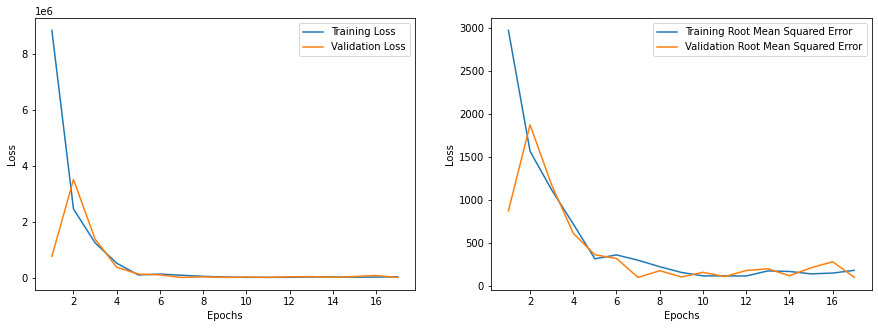

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of HDFC

In [58]:
HDFC_prediction = HDFC_Model.predict(HDFC_Final_Test_X)

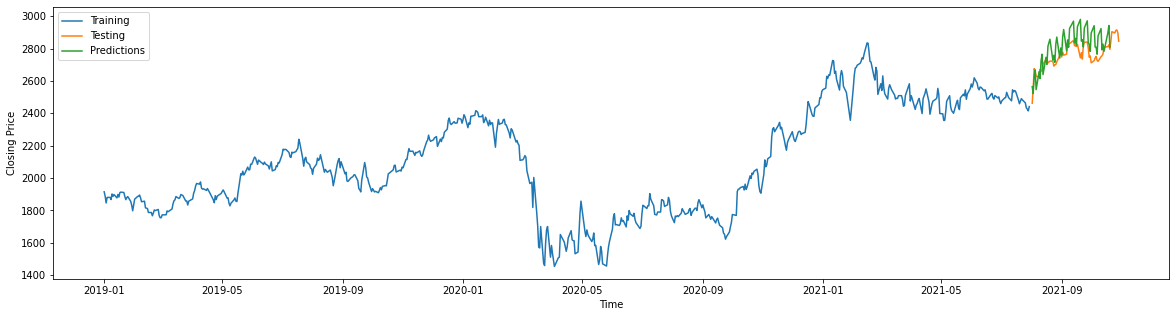

In [59]:
plt.figure(figsize=(20, 5))
plt.plot(HDFC['date'][HDFC['date'] < '2021-08-01'], HDFC['adj close'][HDFC['date'] < '2021-08-01'], label = 'Training')
plt.plot(HDFC['date'][HDFC['date'] >= '2021-08-01'], HDFC['adj close'][HDFC['date'] >= '2021-08-01'], label = 'Testing')
plt.plot(HDFC['date'][HDFC['date'] >= '2021-08-01'][:-7], HDFC_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [60]:
rmse = math.sqrt(mean_squared_error(HDFC_Test_Y.reshape(-1, 5), HDFC_prediction))
mape = np.mean(np.abs(HDFC_prediction - HDFC_Test_Y.reshape(-1, 5))/np.abs(HDFC_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 97.0194573739215
MAPE: 0.02780011097631451


#HUL

In [61]:
HUL.tail()

,ticker,date,open,high,low,close,adj close,volume,Moving Average for 10 days,Moving Average for 20 days,Moving Average for 50 days,Daily Return
692,HINDUNILVR.NS,2021-10-25,2454.1,2463.55,2410.00,2455.85,2455.85,1560090.0,2565.270,2628.3775,2665.198,0.000713
693,HINDUNILVR.NS,2021-10-26,2468.9,2468.90,2417.05,2436.85,2436.85,1594662.0,2544.445,2614.7450,2666.089,-0.007737
694,HINDUNILVR.NS,2021-10-27,2455.0,2455.20,2391.15,2396.60,2396.60,3082296.0,2516.490,2598.3825,2665.931,-0.016517
695,HINDUNILVR.NS,2021-10-28,2400.0,2416.00,2368.00,2389.65,2389.65,2014755.0,2490.780,2583.6000,2665.196,-0.002900
696,HINDUNILVR.NS,2021-10-29,2400.0,2400.00,2376.00,2383.60,2383.60,847292.0,2464.185,2567.6900,2663.192,-0.002532


In [62]:
HUL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ticker                      697 non-null    object 
 1   date                        697 non-null    object 
 2   open                        697 non-null    float64
 3   high                        697 non-null    float64
 4   low                         697 non-null    float64
 5   close                       697 non-null    float64
 6   adj close                   697 non-null    float64
 7   volume                      697 non-null    float64
 8   Moving Average for 10 days  688 non-null    float64
 9   Moving Average for 20 days  678 non-null    float64
 10  Moving Average for 50 days  648 non-null    float64
 11  Daily Return                696 non-null    float64
dtypes: float64(10), object(2)
memory usage: 65.5+ KB


In [63]:
# Change Dtype of date column
HUL["date"] = pd.to_datetime(HUL["date"])

###Split the Data into Training and Test set
    Training Period: 2019-01-01 - 2021-08-01

    Testing Period:  2021-08-01 - 2021-10-29

In [64]:
HUL_date = '2021-08-01'
HUL_Train_X, HUL_Train_Y, HUL_Test_X, HUL_Test_Y = Dataset(HUL,'adj close', 'date', HUL_date)
HUL_Train_SMA_X, HUL_Train_SMA_Y, HUL_Test_SMA_X, HUL_Test_SMA_Y = Dataset(HUL_SMA_sub,'SMA', 'time', HUL_date)
HUL_Train_EMA_X, HUL_Train_EMA_Y, HUL_Test_EMA_X, HUL_Test_EMA_Y = Dataset(HUL_EMA_sub,'EMA', 'time', HUL_date)

In [65]:
HUL_Train_X.shape, HUL_Train_Y.shape, HUL_Test_X.shape, HUL_Test_Y.shape

((126, 5, 1), (126, 5, 1), (11, 5, 1), (11, 5, 1))

In [66]:
HUL['adj close'].head(20)

0     1735.48
1     1719.58
2     1723.24
3     1716.78
4     1719.91
5     1706.33
6     1719.96
7     1721.12
8     1704.93
9     1699.63
10    1724.64
11    1707.97
12    1687.68
13    1680.55
14    1683.25
15    1686.43
16    1702.81
17    1695.39
18    1692.79
19    1679.49
Name: adj close, dtype: float64

In [67]:
HUL_Train_X[0], HUL_Train_Y[0]

(array([[1735.48],
        [1719.58],
        [1723.24],
        [1716.78],
        [1719.91]]), array([[1706.33],
        [1719.96],
        [1721.12],
        [1704.93],
        [1699.63]]))

In [68]:
HUL_Train_X[1], HUL_Train_Y[1]

(array([[1706.33],
        [1719.96],
        [1721.12],
        [1704.93],
        [1699.63]]), array([[1724.64],
        [1707.97],
        [1687.68],
        [1680.55],
        [1683.25]]))

In [69]:
HUL_Train_SMA_X.shape, HUL_Train_SMA_Y.shape, HUL_Test_SMA_X.shape, HUL_Test_SMA_X.shape

((126, 5, 1), (126, 5, 1), (11, 5, 1), (11, 5, 1))

In [70]:
HUL_Train_EMA_X.shape, HUL_Train_EMA_Y.shape, HUL_Test_EMA_X.shape, HUL_Test_EMA_X.shape

((126, 5, 1), (126, 5, 1), (11, 5, 1), (11, 5, 1))

In [71]:
HUL_Train_X[0], HUL_Train_SMA_X[0]

(array([[1735.48],
        [1719.58],
        [1723.24],
        [1716.78],
        [1719.91]]), array([[1738.1701],
        [1732.7018],
        [1727.2765],
        [1722.1386],
        [1720.3285]]))

In [72]:
HUL_Final_Train_X = np.concatenate((HUL_Train_X, HUL_Train_SMA_X, HUL_Train_EMA_X), axis=2)
HUL_Final_Test_X = np.concatenate((HUL_Test_X, HUL_Test_SMA_X, HUL_Test_EMA_X), axis=2)

In [73]:
HUL_Final_Train_X.shape, HUL_Train_Y.shape, HUL_Final_Test_X.shape, HUL_Test_Y.shape

((126, 5, 3), (126, 5, 1), (11, 5, 3), (11, 5, 1))

### Model Fitting

In [74]:
HUL_Model = Model()

In [75]:
HUL_Model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [76]:
HUL_hist = HUL_Model.fit(HUL_Final_Train_X, HUL_Train_Y, epochs = 10000, validation_data = (HUL_Final_Test_X, HUL_Test_Y), callbacks=[callback])

Epoch 1/10000
4/4 [==============================] - 3s 160ms/step - loss: 4554555.0000 - root_mean_squared_error: 2134.1401 - val_loss: 4736315.0000 - val_root_mean_squared_error: 2176.3076
Epoch 2/10000
4/4 [==============================] - 0s 39ms/step - loss: 2007422.0000 - root_mean_squared_error: 1416.8352 - val_loss: 757895.3750 - val_root_mean_squared_error: 870.5719
Epoch 3/10000
4/4 [==============================] - 0s 38ms/step - loss: 923195.3125 - root_mean_squared_error: 960.8305 - val_loss: 401182.9688 - val_root_mean_squared_error: 633.3901
Epoch 4/10000
4/4 [==============================] - 0s 38ms/step - loss: 205201.8750 - root_mean_squared_error: 452.9922 - val_loss: 201672.4062 - val_root_mean_squared_error: 449.0795
Epoch 5/10000
4/4 [==============================] - 0s 39ms/step - loss: 282991.0625 - root_mean_squared_error: 531.9691 - val_loss: 270232.5625 - val_root_mean_squared_error: 519.8389
Epoch 6/10000
4/4 [==============================] - 0s 38ms/st

In [77]:
history_dict = HUL_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

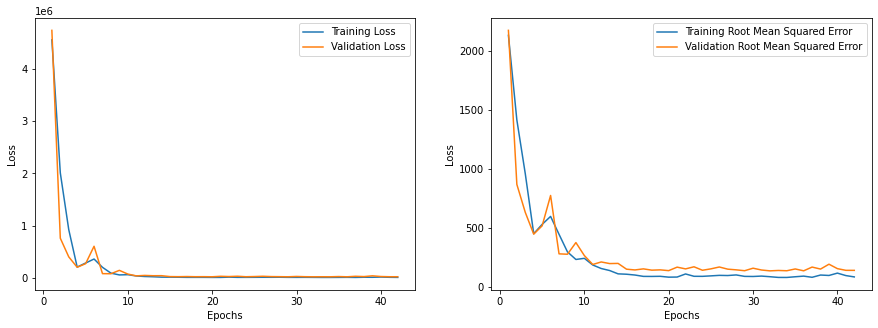

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of HUL

In [79]:
HUL_prediction = HUL_Model.predict(HUL_Final_Test_X)

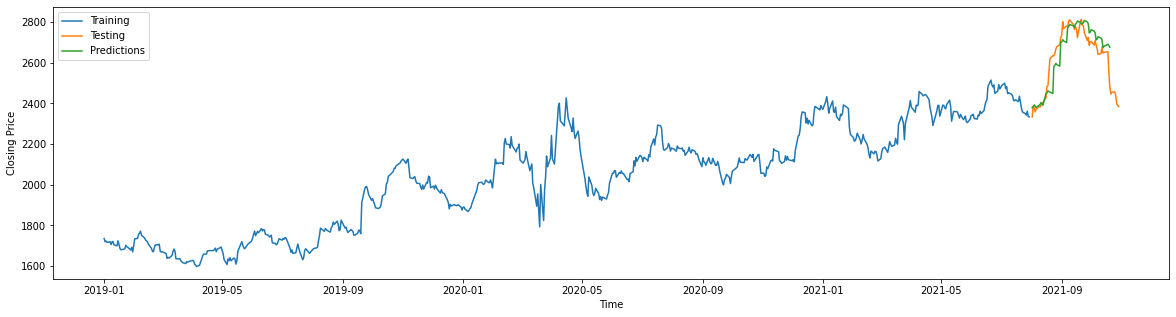

In [80]:
plt.figure(figsize=(20, 5))
plt.plot(HUL['date'][HUL['date'] < '2021-08-01'], HUL['adj close'][HUL['date'] < '2021-08-01'], label = 'Training')
plt.plot(HUL['date'][HUL['date'] >= '2021-08-01'], HUL['adj close'][HUL['date'] >= '2021-08-01'], label = 'Testing')
plt.plot(HUL['date'][HUL['date'] >= '2021-08-01'][:-7], HUL_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [81]:
rmse = math.sqrt(mean_squared_error(HUL_Test_Y.reshape(-1, 5), HUL_prediction))
mape = np.mean(np.abs(HUL_prediction - HUL_Test_Y.reshape(-1, 5))/np.abs(HUL_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 137.8977195169357
MAPE: 0.04284848878931893


#MARUTI

In [82]:
MARUTI.tail()

,ticker,date,open,high,low,close,adj close,volume,Moving Average for 10 days,Moving Average for 20 days,Moving Average for 50 days,Daily Return
692,MARUTI.NS,2021-10-25,7355.0,7396.05,7219.65,7260.60,7260.60,247986.0,7552.180,7439.1900,7082.932,-0.020016
693,MARUTI.NS,2021-10-26,7265.0,7337.95,7210.20,7297.35,7297.35,292052.0,7511.835,7433.8850,7088.639,0.005062
694,MARUTI.NS,2021-10-27,7285.0,7461.25,7244.00,7356.25,7356.25,1217557.0,7478.080,7430.5050,7095.720,0.008071
695,MARUTI.NS,2021-10-28,7250.0,7529.70,7235.05,7369.70,7369.70,961188.0,7466.835,7429.7875,7106.577,0.001828
696,MARUTI.NS,2021-10-29,7350.0,7478.15,7294.85,7466.30,7466.30,179815.0,7463.775,7436.2000,7118.195,0.013108


In [83]:
MARUTI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ticker                      697 non-null    object 
 1   date                        697 non-null    object 
 2   open                        697 non-null    float64
 3   high                        697 non-null    float64
 4   low                         697 non-null    float64
 5   close                       697 non-null    float64
 6   adj close                   697 non-null    float64
 7   volume                      697 non-null    float64
 8   Moving Average for 10 days  688 non-null    float64
 9   Moving Average for 20 days  678 non-null    float64
 10  Moving Average for 50 days  648 non-null    float64
 11  Daily Return                696 non-null    float64
dtypes: float64(10), object(2)
memory usage: 65.5+ KB


In [84]:
# Change Dtype of date column
MARUTI["date"] = pd.to_datetime(MARUTI["date"])

###Split the Data into Training and Test set
    Training Period: 2019-01-01 - 2021-08-01

    Testing Period:  2021-08-01 - 2021-10-29

In [98]:
MARUTI_EMA_sub.head()

,time,SMA
0,2019-01-01,7387.3402
1,2019-01-02,7340.2101
2,2019-01-03,7271.0326
3,2019-01-04,7215.5207
4,2019-01-07,7197.2854


In [102]:
MARUTI_date = '2021-08-01'
MARUTI_Train_X, MARUTI_Train_Y, MARUTI_Test_X, MARUTI_Test_Y = Dataset(MARUTI,'adj close', 'date', MARUTI_date)
MARUTI_Train_SMA_X, MARUTI_Train_SMA_Y, MARUTI_Test_SMA_X, MARUTI_Test_SMA_Y = Dataset(MARUTI_SMA_sub,'SMA', 'time', MARUTI_date)
MARUTI_Train_EMA_X, MARUTI_Train_EMA_Y, MARUTI_Test_EMA_X, MARUTI_Test_EMA_Y = Dataset(MARUTI_EMA_sub,'EMA', 'time', MARUTI_date)

In [103]:
MARUTI_Train_X.shape, MARUTI_Train_Y.shape, MARUTI_Test_X.shape, MARUTI_Test_Y.shape

((126, 5, 1), (126, 5, 1), (11, 5, 1), (11, 5, 1))

In [104]:
MARUTI['adj close'].head(20)

0     7261.91
1     7058.96
2     6996.90
3     7026.57
4     7150.46
5     7225.68
6     7277.54
7     7179.16
8     7110.10
9     7195.76
10    7143.75
11    7100.14
12    7125.40
13    7146.47
14    7001.22
15    6865.68
16    6842.91
17    6838.24
18    6326.20
19    6323.91
Name: adj close, dtype: float64

In [105]:
MARUTI_Train_X[0], MARUTI_Train_Y[0]

(array([[7261.91],
        [7058.96],
        [6996.9 ],
        [7026.57],
        [7150.46]]), array([[7225.68],
        [7277.54],
        [7179.16],
        [7110.1 ],
        [7195.76]]))

In [106]:
MARUTI_Train_X[1], MARUTI_Train_Y[1]

(array([[7225.68],
        [7277.54],
        [7179.16],
        [7110.1 ],
        [7195.76]]), array([[7143.75],
        [7100.14],
        [7125.4 ],
        [7146.47],
        [7001.22]]))

In [107]:
MARUTI_Train_SMA_X.shape, MARUTI_Train_SMA_Y.shape, MARUTI_Test_SMA_X.shape, MARUTI_Test_SMA_X.shape

((126, 5, 1), (126, 5, 1), (11, 5, 1), (11, 5, 1))

In [108]:
MARUTI_Train_EMA_X.shape, MARUTI_Train_EMA_Y.shape, MARUTI_Test_EMA_X.shape, MARUTI_Test_EMA_X.shape

((126, 5, 1), (126, 5, 1), (11, 5, 1), (11, 5, 1))

In [109]:
MARUTI_Train_X[0], MARUTI_Train_SMA_X[0]

(array([[7261.91],
        [7058.96],
        [6996.9 ],
        [7026.57],
        [7150.46]]), array([[7387.3402],
        [7340.2101],
        [7271.0326],
        [7215.5207],
        [7197.2854]]))

In [110]:
MARUTI_Final_Train_X = np.concatenate((MARUTI_Train_X, MARUTI_Train_SMA_X, MARUTI_Train_EMA_X), axis=2)
MARUTI_Final_Test_X = np.concatenate((MARUTI_Test_X, MARUTI_Test_SMA_X, MARUTI_Test_EMA_X), axis=2)

In [111]:
MARUTI_Final_Train_X.shape, MARUTI_Train_Y.shape, MARUTI_Final_Test_X.shape, MARUTI_Test_Y.shape

((126, 5, 3), (126, 5, 1), (11, 5, 3), (11, 5, 1))

### Model Fitting

In [112]:
MARUTI_Model = Model()

In [113]:
MARUTI_Model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [114]:
MARUTI_hist = MARUTI_Model.fit(MARUTI_Final_Train_X, MARUTI_Train_Y, epochs = 10000, validation_data = (MARUTI_Final_Test_X, MARUTI_Test_Y), callbacks=[callback])

Epoch 1/10000
4/4 [==============================] - 3s 154ms/step - loss: 32960894.0000 - root_mean_squared_error: 5741.1582 - val_loss: 3955832.0000 - val_root_mean_squared_error: 1988.9275
Epoch 2/10000
4/4 [==============================] - 0s 39ms/step - loss: 13135786.0000 - root_mean_squared_error: 3624.3323 - val_loss: 2743931.0000 - val_root_mean_squared_error: 1656.4816
Epoch 3/10000
4/4 [==============================] - 0s 40ms/step - loss: 8524881.0000 - root_mean_squared_error: 2919.7400 - val_loss: 23228408.0000 - val_root_mean_squared_error: 4819.5859
Epoch 4/10000
4/4 [==============================] - 0s 41ms/step - loss: 11620982.0000 - root_mean_squared_error: 3408.9563 - val_loss: 7517107.0000 - val_root_mean_squared_error: 2741.7344
Epoch 5/10000
4/4 [==============================] - 0s 38ms/step - loss: 4854682.0000 - root_mean_squared_error: 2203.3342 - val_loss: 928204.8125 - val_root_mean_squared_error: 963.4338
Epoch 6/10000
4/4 [============================

In [115]:
history_dict = MARUTI_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

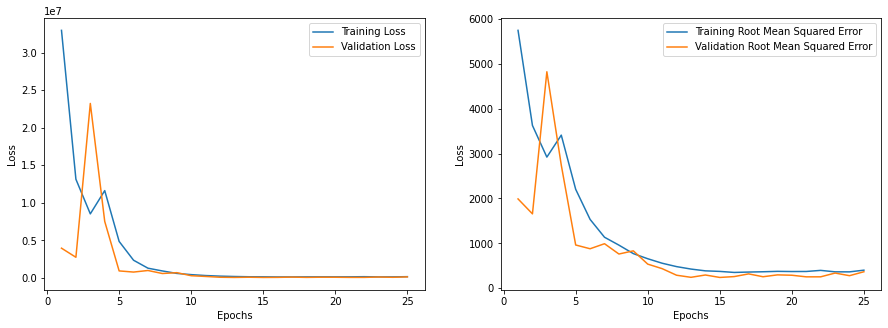

In [116]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of MARUTI

In [117]:
MARUTI_prediction = MARUTI_Model.predict(MARUTI_Final_Test_X)

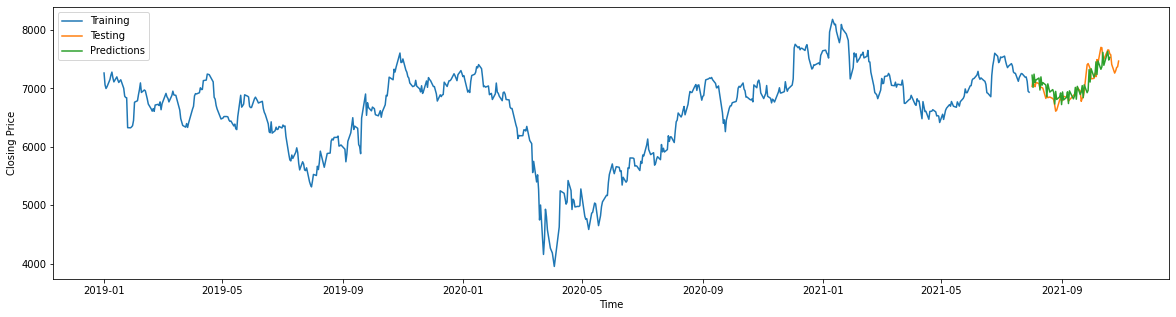

In [118]:
plt.figure(figsize=(20, 5))
plt.plot(MARUTI['date'][MARUTI['date'] < '2021-08-01'], MARUTI['adj close'][MARUTI['date'] < '2021-08-01'], label = 'Training')
plt.plot(MARUTI['date'][MARUTI['date'] >= '2021-08-01'], MARUTI['adj close'][MARUTI['date'] >= '2021-08-01'], label = 'Testing')
plt.plot(MARUTI['date'][MARUTI['date'] >= '2021-08-01'][:-7], MARUTI_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [119]:
rmse = math.sqrt(mean_squared_error(MARUTI_Test_Y.reshape(-1, 5), MARUTI_prediction))
mape = np.mean(np.abs(MARUTI_prediction - MARUTI_Test_Y.reshape(-1, 5))/np.abs(MARUTI_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 241.0893902679114
MAPE: 0.026907316884690256
